In [7]:
import pandas as pd
df = pd.read_csv("Data.csv")

In [8]:
df['X'] = df['X'].apply(lambda X:sum(map(int, X.split('-')))/2)
print(df.describe())

                  X          Y          E
count     37.000000  37.000000  37.000000
mean    3271.081081   1.755081   0.289676
std     4805.451130   1.205085   0.250918
min       14.000000  -0.223000   0.120000
25%      120.500000   0.913000   0.130000
50%      979.000000   1.856000   0.179000
75%     4256.500000   2.334000   0.290000
max    18494.000000   4.435000   1.030000


In [34]:
E = df['X']
t = df['Y']
err = df['E']

In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<IPython.core.display.Javascript object>


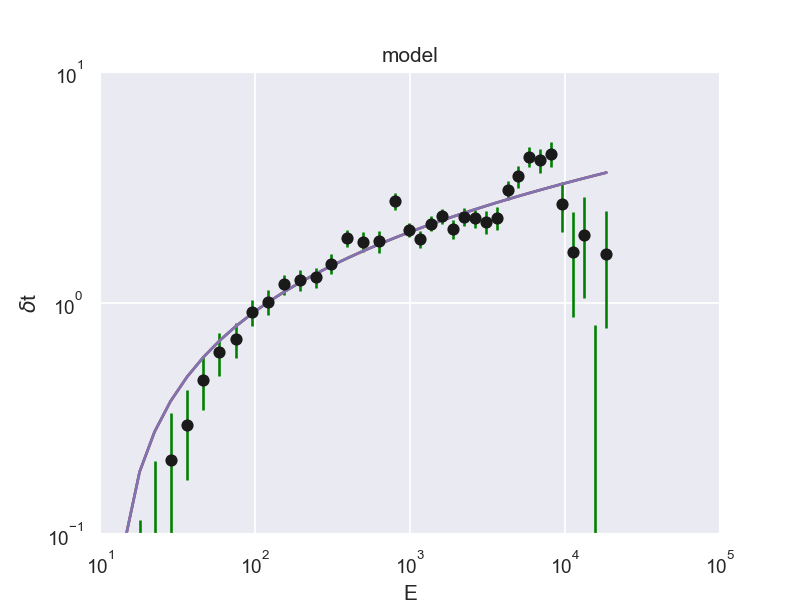

In [37]:
fr = plt.figure

axis = plt.subplot(xscale='log', yscale='log', xlim=(10, 1e5), ylim=(0.1,10))
axis.errorbar(E, t, err, fmt='ok', ecolor='green')
axis.set(xlabel='E', ylabel='$\delta$t', title='input data',);

In [38]:
def no_LIV_model(E, theta):
    return theta[0]*(E**theta[1] - 11.34**theta[1])
    

In [39]:
def log_prior(theta):
    if abs(theta[1]>1):
        return -np.inf
    else:
        return 0
    

In [40]:
import numpy as np

def log_likelihood(theta, df=df):
    E = df['X']
    t = df['Y']
    err = df['E']
    t_fit = no_LIV_model(E, theta)
    return -0.5 * np.sum(np.log(2 * np.pi * err ** 2) 
                         + (t - t_fit) ** 2 / err ** 2)
    
    

In [41]:
def log_posterior(theta, df=df):
    theta = np.asarray(theta)
    return log_prior(theta) + log_likelihood(theta, df)

In [79]:
import emcee

def compute_mcmc(log_posterior=log_posterior, nwalkers=50, nsteps=2000, nburn=1000):
    ndim = 2
    rng = np.random.RandomState(0)
    starting_guesses = 1e-2*rng.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[df])
    sampler.run_mcmc(starting_guesses,nsteps)
    trace = sampler.chain[:, nburn:, :].reshape(-1, ndim)
    return sampler

In [81]:
sampler = compute_mcmc()

samples = sampler.flatchain
theta_max = samples[np.argmax(sampler.flatlnprobability)]

In [89]:
print (theta_max)
best_fit = no_LIV_model(E, theta_max)
ax.plot(E, best_fit)
